In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt 

data_file=('Cardiac_Outcomes.xlsx')
all_sheets=pd.read_excel(data_file,sheet_name=None)
#to access sheet by name in excel
Hospital_data=all_sheets['Hospitalization_Discharge']
Cardiac_data=all_sheets['CardiacComplications']
Response_data=all_sheets['Responsivenes']
Patient_data=all_sheets['PatientHistory']
lab_data=all_sheets['Labs']
Demography_data=all_sheets['Demography']
Prescription_data=all_sheets['Patient_Precriptions']

# Q 24 
# grade 2 (moderate anemia), 80-100 g/l; grade 3 (severe anemia), 65-80 g/l; and grade 4 (life-threatening anemia), <65 g/l.

In [11]:
severe_anemia_df = lab_data[lab_data['hemoglobin']  < 80 ]
#print(len(severe_anemia_df))

hdf = Hospital_data[Hospital_data['inpatient_number'].isin (severe_anemia_df['inpatient_number'])]

print("Correlation between anemeia and discharge days",severe_anemia_df['hemoglobin'].corr(hdf['dischargeDay']))

176
Correlation between anemeia and discharge days 0.03996166868194572


# Q46 Convert occupation into numeric by Label encoding

In [ ]:
from sklearn.preprocessing import  LabelEncoder

encoder = LabelEncoder()

Demography_data['occupation']= encoder.fit_transform(Demography_data['occupation']) 
Demography_data['occupation'].value_counts()

# Q47 Generate a 3x3 Array using Random values between 1to 9 and Fix the values and position in Next Run.

In [ ]:
import numpy as np

np.random.seed(0)
array = np.random.randint(low=0, high=9, size=(3,3))
print(array)

#  Q79  Create a Funnel chart of BMI Category(Normal Weight, Underweight and Obese)  

             BMI  counts
0  Normal Weight    1163
1    Underweight     508
2          Obese     330


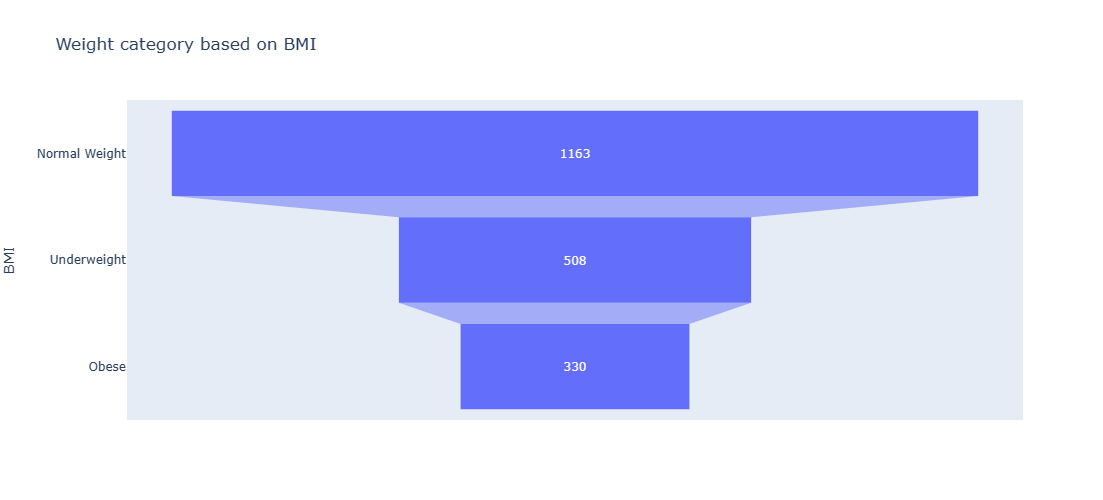

In [13]:
import plotly.express as px

bins = [0,18.5,24.9,100]
group_names=['Underweight','Normal Weight','Obese']

#count=Demography_data.groupby(pd.cut(Demography_data['BMI'],bins,labels=group_names),observed='False')['inpatient_number'].count()

#converting the output to dtaframe using rename_axis
count=Demography_data.groupby(pd.cut(Demography_data['BMI'],bins,labels=group_names),observed='False')['inpatient_number'].count().sort_values(ascending=False).rename_axis('BMI').reset_index(name='counts')

print(count)

fig = px.funnel(count, x='counts', y='BMI',opacity=1,height=500,width=700,title='Weight category based on BMI')
fig.show()

# Q76 What is the ratio of those with congestive heart failure to those who had type of heart failure Both?

In [14]:
congest_heart = Cardiac_data[Cardiac_data['congestive_heart_failure'] == 1]

type_of_heart_failure = Cardiac_data[Cardiac_data['type_of_heart_failure'] == 'Both']

print(len(congest_heart),len(type_of_heart_failure))
ratio = (len(congest_heart)/len(type_of_heart_failure))

print("Ratio of the people with congestive heart failure to those who had type of heart failure Both :",f"{ratio:.2f}")

1872 1480
Ratio of the people with congestive heart failure to those who had type of heart failure Both : 1.26
